<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# pip install pandas_profiling

In [3]:
# Check panda_profiling libraries for EDA
from pandas_profiling import ProfileReport


### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [4]:
houseprice = pd.read_csv("datasets/sacramento_real_estate_transactions.csv")

In [5]:
houseprice.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [6]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [7]:
# change to datetime
houseprice['sale_date'] = pd.to_datetime(houseprice['sale_date'])

C:\Users\Tata\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [8]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   street     985 non-null    object        
 1   city       985 non-null    object        
 2   zip        985 non-null    int64         
 3   state      985 non-null    object        
 4   beds       985 non-null    int64         
 5   baths      985 non-null    int64         
 6   sq__ft     985 non-null    int64         
 7   type       985 non-null    object        
 8   sale_date  985 non-null    datetime64[ns]
 9   price      985 non-null    int64         
 10  latitude   985 non-null    float64       
 11  longitude  985 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 92.5+ KB


In [9]:
# Check 0 and remove negative value
houseprice["beds"].value_counts()

3    413
4    258
2    133
0    108
5     59
1     10
6      3
8      1
Name: beds, dtype: int64

In [10]:
houseprice["beds"] = houseprice["beds"]

In [11]:
houseprice["baths"].value_counts()

2    544
1    180
3    132
0    108
4     19
5      2
Name: baths, dtype: int64

In [12]:
negative_sq = houseprice[houseprice["sq__ft"]<0]
negative_sq

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,2008-05-16,-210944,-121.503471,38.668433


In [13]:
# Negative value seem to be a valid data with wrong sign. So, negative sign is removed.
houseprice["sq__ft"] = houseprice["sq__ft"] .mask(houseprice["sq__ft"]  < 0, houseprice["sq__ft"].abs())

In [14]:
houseprice["sq__ft"]

0       836
1      1167
2       796
3       852
4       797
       ... 
980    2280
981    1477
982    1216
983    1685
984    1362
Name: sq__ft, Length: 985, dtype: int64

In [15]:
houseprice["sq__ft"].describe()

count     985.000000
mean     1314.916751
std       853.048243
min         0.000000
25%       952.000000
50%      1304.000000
75%      1718.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [16]:
negative_houseprice = houseprice[houseprice["price"]<0]
negative_houseprice

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,984,Condo,2008-05-16,-210944,-121.503471,38.668433


In [17]:
# Negative value seem to be a valid data with wrong sign. So, negative sign is removed.
houseprice["price"] = houseprice["price"] .mask(houseprice["price"]  < 0, houseprice["price"].abs())

In [18]:
houseprice.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.445121,-121.193371
std,85.176072,1.307932,0.895371,853.048243,138365.839085,5.103637,5.100670
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [19]:
houseprice["missing"] = ((houseprice["beds"] == 0) | (houseprice["baths"] == 0) | (houseprice["sq__ft"] == 0))


In [20]:
# houseprice["missing"] = houseprice~((houseprice["beds"] == 0) | (houseprice["baths"] == 0) | (houseprice["sq__ft"] == 0))

In [21]:
houseprice["missing"].value_counts()

False    814
True     171
Name: missing, dtype: int64

In [22]:
# Remove duplicates
houseprice = houseprice.drop_duplicates()

In [23]:
# Save original to come back to later 
houseprice_original = houseprice

# Drop house with 0 square feet
houseprice = houseprice[houseprice["sq__ft"]>0]
print(houseprice.shape)
# Drop house with 0 bedroom
houseprice = houseprice[houseprice["beds"]>0]
print(houseprice.shape)
# Drop house with 0 bath
houseprice = houseprice[houseprice["baths"]>0]
print(houseprice.shape)

(812, 13)
(812, 13)
(812, 13)


In [24]:
houseprice.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,95761.592365,3.245074,1.961823,1592.461823,229723.743842,38.379663,-121.181441
std,85.281835,0.851654,0.669778,664.036825,119819.020404,5.619137,5.617824
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473653,-121.451463
50%,95820.000000,3.000000,2.000000,1419.500000,208000.000000,38.591547,-121.404863
75%,95828.250000,4.000000,2.000000,1852.250000,285000.000000,38.674385,-121.325727
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,38.668433


In [25]:
houseprice["city"].unique()
#houseprice["city"].value_counts()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS',
       'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'LINCOLN',
       'CAMERON PARK', 'ROCKLIN', 'LOOMIS', 'AUBURN', 'EL DORADO HILLS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'DIAMOND SPRINGS', 'COOL',
       'WALNUT GROVE', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [26]:
#houseprice["zip"].value_counts()

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [27]:
houseprice.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

In [28]:
clean = pd.read_csv("datasets/sacramento_cleaned_dataframe.csv")

In [29]:
clean.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,95761.592365,3.245074,1.961823,1592.461823,229723.743842,38.379663,-121.181441
std,85.281835,0.851654,0.669778,664.036825,119819.020404,5.619137,5.617824
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473653,-121.451463
50%,95820.000000,3.000000,2.000000,1419.500000,208000.000000,38.591547,-121.404863
75%,95828.250000,4.000000,2.000000,1852.250000,285000.000000,38.674385,-121.325727
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,38.668433


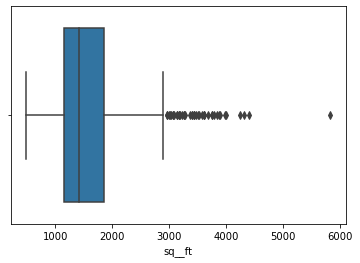

In [30]:
# We would need to check the outlier values as the values lies more than 3 standard deviation away from the mean.
# Linear models are easily skewed by outliers
sns.boxplot(x=clean["sq__ft"]);

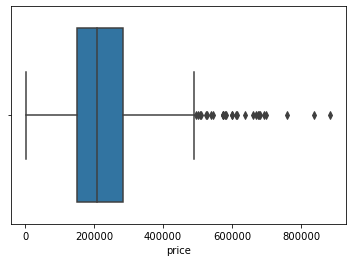

In [31]:
sns.boxplot(x=clean["price"]);

In [32]:
# We would remove outliers

In [33]:
# Remove sq__ft extreme outliers
upperlimit = clean["sq__ft"].mean() + 5*np.std(clean["sq__ft"])
remove = clean[clean["sq__ft"]<upperlimit]

In [34]:
#upperlimit

In [35]:
#clean["sq__ft"].mean()

In [36]:
remove.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,95761.689273,3.245376,1.959309,1587.246609,230004.537608,38.379527,-121.181505
std,85.289715,0.852136,0.666349,647.593138,119625.334075,5.622603,5.621291
min,95603.000000,1.000000,1.000000,484.000000,30000.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148875.000000,38.473531,-121.451482
50%,95820.000000,3.000000,2.000000,1419.000000,208000.000000,38.591618,-121.404999
75%,95828.500000,4.000000,2.000000,1851.000000,285000.000000,38.674545,-121.325958
max,95864.000000,8.000000,5.000000,4400.000000,884790.000000,39.008159,38.668433


In [37]:
# Remove price outliers
upperlimit = clean["price"].mean() + 5*np.std(clean["price"])
remove = remove[remove["price"]<upperlimit]

In [38]:
upperlimit

828449.8312880466

In [39]:
remove.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,95761.912237,3.243511,1.955501,1583.724351,228442.385661,38.378946,-121.181548
std,85.270237,0.852362,0.662277,640.788014,115557.650065,5.629536,5.628243
min,95603.000000,1.000000,1.000000,484.000000,30000.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473775,-121.451520
50%,95820.000000,3.000000,2.000000,1418.000000,208000.000000,38.591618,-121.405912
75%,95829.000000,4.000000,2.000000,1851.000000,284893.000000,38.674226,-121.326830
max,95864.000000,8.000000,5.000000,4303.000000,760000.000000,39.008159,38.668433


In [40]:
clean.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,95761.592365,3.245074,1.961823,1592.461823,229723.743842,38.379663,-121.181441
std,85.281835,0.851654,0.669778,664.036825,119819.020404,5.619137,5.617824
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473653,-121.451463
50%,95820.000000,3.000000,2.000000,1419.500000,208000.000000,38.591547,-121.404863
75%,95828.250000,4.000000,2.000000,1852.250000,285000.000000,38.674385,-121.325727
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,38.668433


In [41]:
clean['sale_date'] = pd.to_datetime(clean['sale_date'])

In [42]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   street     812 non-null    object        
 1   city       812 non-null    object        
 2   zip        812 non-null    int64         
 3   state      812 non-null    object        
 4   beds       812 non-null    int64         
 5   baths      812 non-null    int64         
 6   sq__ft     812 non-null    int64         
 7   type       812 non-null    object        
 8   sale_date  812 non-null    datetime64[ns]
 9   price      812 non-null    int64         
 10  latitude   812 non-null    float64       
 11  longitude  812 non-null    float64       
 12  missing    812 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 77.0+ KB


In [43]:
profile = ProfileReport(clean, title="Pandas Profiling Report")

In [44]:
#profile.to_widgets()

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [45]:
# We would explore number of bedrooms, bathrooms and square feet

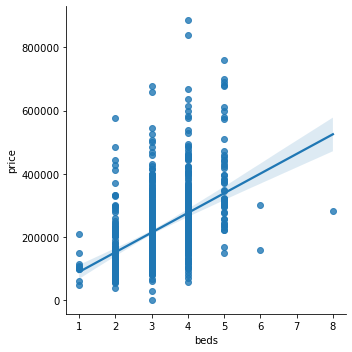

In [46]:
sns.lmplot(x = "beds", y = "price", data = clean);

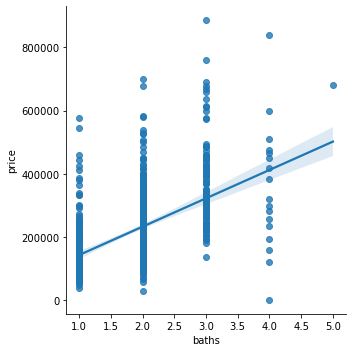

In [47]:
sns.lmplot(x = "baths", y = "price", data = clean);

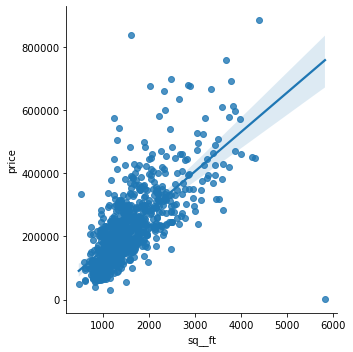

In [48]:
sns.lmplot(x = "sq__ft", y = "price", data = clean);

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [49]:
# Number of bedrooms, bathrooms and square feet should be considered.
# Square feet would be the best predictor as it looks highly correlated and best fit with sale price.
# Moreover,Square feet is more detailed with higher variance than others.

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [50]:
x = clean[["sq__ft"]]
y = clean["price"]
lr = LinearRegression()
lr.fit (x,y)
y_preds =lr.predict(x)
print(lr.coef_)
print(lr.intercept_)

[125.05487806]
30578.62479426342


### 6. Interpret the intercept and the slope.

In [51]:
print(f"The intercept can be interpret as the predicted house price start at {round(lr.intercept_,2)} \
for \n0 square feet house.")
print(f"The intercept can be easier to understand by using 1000 square feet house,\
\nthe predicted house price start at {round(lr.intercept_ + lr.coef_[0]*1000,2)}.")

The intercept can be interpret as the predicted house price start at 30578.62 for 
0 square feet house.
The intercept can be easier to understand by using 1000 square feet house,
the predicted house price start at 155633.5.


In [52]:
print(f"The slope can be interpret as the average house price increased by \
{round(lr.coef_[0],2)} per square feet.")

The slope can be interpret as the average house price increased by 125.05 per square feet.


### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [53]:
# The model can predict house price using square feet as the bigger house tends to have higher price.

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [54]:
# Create residuals (aka errors): (y - y_hat)
resids = y - y_preds

In [55]:
resids

0      -75902.502852
1     -108305.667490
2      -61242.307730
3      -67818.380901
4      -48347.362608
           ...      
807    -83278.746771
808     18715.320311
809     52354.643485
810     -5995.094326
811     34834.631288
Name: price, Length: 812, dtype: float64

In [56]:
df = pd.DataFrame({"y": y,"predictions":y_preds, "residuals":resids})
#df

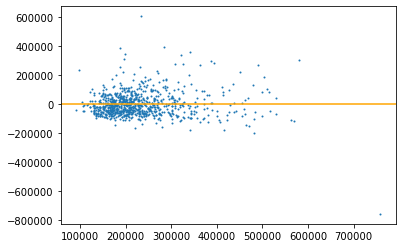

In [57]:
plt.scatter(y_preds, resids, s=1)
plt.axhline(0, color="orange");

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [58]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   street     812 non-null    object        
 1   city       812 non-null    object        
 2   zip        812 non-null    int64         
 3   state      812 non-null    object        
 4   beds       812 non-null    int64         
 5   baths      812 non-null    int64         
 6   sq__ft     812 non-null    int64         
 7   type       812 non-null    object        
 8   sale_date  812 non-null    datetime64[ns]
 9   price      812 non-null    int64         
 10  latitude   812 non-null    float64       
 11  longitude  812 non-null    float64       
 12  missing    812 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 77.0+ KB


In [59]:
clean.dtypes

street               object
city                 object
zip                   int64
state                object
beds                  int64
baths                 int64
sq__ft                int64
type                 object
sale_date    datetime64[ns]
price                 int64
latitude            float64
longitude           float64
missing                bool
dtype: object

In [60]:
clean["day"] = clean["sale_date"].dt.day

In [61]:
clean["month"] = clean["sale_date"].dt.month

In [62]:
clean.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,missing,day,month
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,False,21,5
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028,False,21,5
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839,False,21,5
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146,False,21,5
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768,False,21,5


In [63]:
clean.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude,day,month
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.0
mean,95761.592365,3.245074,1.961823,1592.461823,229723.743842,38.379663,-121.181441,18.204433,5.0
std,85.281835,0.851654,0.669778,664.036825,119819.020404,5.619137,5.617824,2.194058,0.0
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,-121.503471,-121.550527,15.000000,5.0
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473653,-121.451463,16.000000,5.0
50%,95820.000000,3.000000,2.000000,1419.500000,208000.000000,38.591547,-121.404863,19.000000,5.0
75%,95828.250000,4.000000,2.000000,1852.250000,285000.000000,38.674385,-121.325727,20.000000,5.0
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,38.668433,21.000000,5.0


In [64]:
clean.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,missing,day,month
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,38.631913,-121.434879,False,21,5
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,38.478902,-121.431028,False,21,5
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,38.618305,-121.443839,False,21,5
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,38.616835,-121.439146,False,21,5
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,38.519470,-121.435768,False,21,5


In [65]:
dummy = pd.get_dummies(clean, columns=["type","city"])

In [66]:
clean.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'missing', 'day',
       'month'],
      dtype='object')

In [67]:
clean.shape

(812, 15)

In [68]:
#clean.corr()

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [69]:
# Day & Month does not make sense as the variations between them is too narrow. Not enough distinction
clean = clean.drop(columns = ["missing", "latitude", "longitude"],axis = 1)

In [70]:
clean.describe()

,zip,beds,baths,sq__ft,price,day,month
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.0
mean,95761.592365,3.245074,1.961823,1592.461823,229723.743842,18.204433,5.0
std,85.281835,0.851654,0.669778,664.036825,119819.020404,2.194058,0.0
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,15.000000,5.0
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,16.000000,5.0
50%,95820.000000,3.000000,2.000000,1419.500000,208000.000000,19.000000,5.0
75%,95828.250000,4.000000,2.000000,1852.250000,285000.000000,20.000000,5.0
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,21.000000,5.0


In [71]:
clean.shape

(812, 12)

### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [72]:
clean.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'day', 'month'],
      dtype='object')

In [73]:
clean.dtypes

street               object
city                 object
zip                   int64
state                object
beds                  int64
baths                 int64
sq__ft                int64
type                 object
sale_date    datetime64[ns]
price                 int64
day                   int64
month                 int64
dtype: object

In [74]:
clean.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,day,month
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,21,5
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,21,5
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,21,5
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,21,5
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,21,5


In [75]:
X_var = ["sq__ft","beds","baths"] # Features
X = clean[X_var]
#X = pd.get_dummies(X, columns=["type","city"]) # Change dummy columns
y = clean["price"]

In [76]:
X

,sq__ft,beds,baths
0,836,2,1
1,1167,3,1
2,796,2,1
3,852,2,1
4,797,2,1
...,...,...,...
807,2280,4,3
808,1477,3,2
809,1216,3,2
810,1685,4,2


In [77]:
X.columns

Index(['sq__ft', 'beds', 'baths'], dtype='object')

In [78]:
X.shape

(812, 3)

In [79]:
#clean.describe()

In [80]:
# Train Model
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [81]:
lr.score(X,y)

0.4838389493845556

In [82]:
y_preds = lr.predict(X)

In [83]:
# Just using absolute values (trimming off - signs)
print(f"MAE is : {metrics.mean_absolute_error(y,y_preds)}")
print(f"MSE is : {metrics.mean_squared_error(y,y_preds)}")

# RMSE is often used because it's easier to explain as it's in
# the units of your y or target variable
print(f"RMSE is : {metrics.mean_squared_error(y,y_preds, squared=False)}")

MAE is : 59746.415270085956
MSE is : 7401190520.97024
RMSE is : 86030.17215471697


In [84]:
X = clean[["sq__ft"]]
y = clean["price"]

In [85]:
# Train Model of only square feet
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [86]:
lr.score(X,y) # R squared = 0.48

0.4803237636121088

In [87]:
y_preds = lr.predict(X)

In [88]:
#y_preds

In [89]:
# Just using absolute values (trimming off - signs)
print(f"MAE is : {metrics.mean_absolute_error(y,y_preds)}")
print(f"MSE is : {metrics.mean_squared_error(y,y_preds)}")

# RMSE is often used because it's easier to explain as it's in
# the units of your y or target variable
print(f"RMSE is : {metrics.mean_squared_error(y,y_preds, squared=False)}")

MAE is : 60294.7404036104
MSE is : 7451594478.392951
RMSE is : 86322.61857933267


In [90]:
def features_test(features):
    X_var = features # Features
    X = clean[X_var]
    X = pd.get_dummies(X, drop_first = False) # Change dummy columns
    y = clean["price"]
    lr = LinearRegression()
    lr.fit(X,y)
    print(f"R Squared is : {lr.score(X,y)}")
    y_preds = lr.predict(X)
    print(f"MAE is : {metrics.mean_absolute_error(y,y_preds)}")
    print(f"MSE is : {metrics.mean_squared_error(y,y_preds)}")
    print(f"RMSE is : {metrics.mean_squared_error(y,y_preds, squared=False)}")


In [91]:
features_test(["sq__ft","beds","baths","type"])

R Squared is : 0.4907564737817076
MAE is : 59157.18274411169
MSE is : 7302000712.022557
RMSE is : 85451.7449325791


In [92]:
# This is the best simple model from logical reason and variable in this data.
X_var = ["sq__ft","beds","baths",'type','city'] # Features
X = clean[X_var]
X = pd.get_dummies(X, columns=["type","city"]) # Change dummy columns
y = clean["price"]

In [93]:
lralls = LinearRegression()
lralls.fit(X,y)

LinearRegression()

In [94]:
lralls.score(X,y) # R squared = 0.676

0.676186705974785

In [95]:
features_test(X_var)

R Squared is : 0.676186705974785
MAE is : 48718.15467322798
MSE is : 4643131982.636002
RMSE is : 68140.53112968817


In [96]:
# We would remove outlier to improve the model.
X_var = ["sq__ft","beds","baths",'type','city'] # Features
X2 = remove[X_var]
X2 = pd.get_dummies(X2, columns=["type","city"]) # Change dummy columns
y2 = remove["price"]

In [97]:
lr2 = LinearRegression()
lr2.fit(X2,y2)

LinearRegression()

In [98]:
lr2.score(X2,y2) # R squared = 0.48

0.6641295216548366

In [99]:
y_preds2 = lr2.predict(X2)

In [100]:
features_test(X_var)

R Squared is : 0.676186705974785
MAE is : 48718.15467322798
MSE is : 4643131982.636002
RMSE is : 68140.53112968817


In [101]:
# Train Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 
# set test_size to 0.7 for 70:30 split

In [102]:
#cross_val_score(lr2, X, y)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

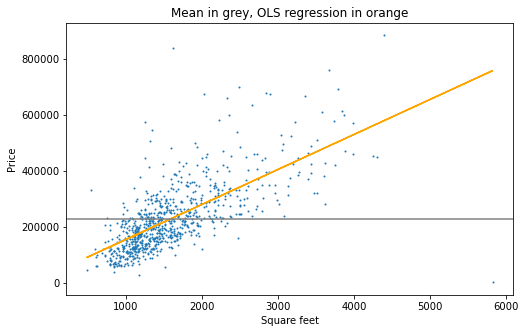

In [103]:
plt.figure(figsize = (8, 5))
plt.scatter(clean["sq__ft"],clean["price"], s=1)
plt.plot(clean["sq__ft"], y_preds, color = "orange");

plt.axhline(clean["price"].mean(), color = 'grey')
plt.xlabel('Square feet')
plt.ylabel('Price')
plt.title('Mean in grey, OLS regression in orange');

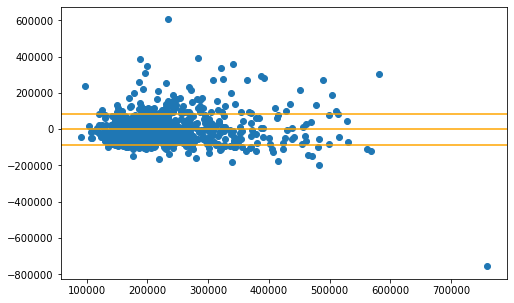

In [104]:
residuals = y - y_preds
np.std(residuals)

plt.figure(figsize = (8, 5))
plt.scatter(y_preds,residuals)
plt.axhline(0,color="orange")
plt.axhline(np.std(residuals),color="orange")
plt.axhline(-np.std(residuals),color="orange");

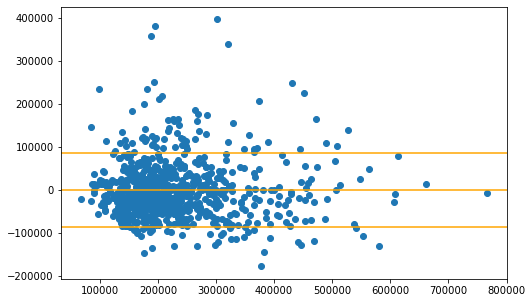

In [105]:
# Model without outliers

residuals2 = y2 - y_preds2
np.std(residuals2)

plt.figure(figsize = (8, 5))
plt.scatter(y_preds2,residuals2)
plt.axhline(0,color="orange")
plt.axhline(np.std(residuals),color="orange")
plt.axhline(-np.std(residuals),color="orange");

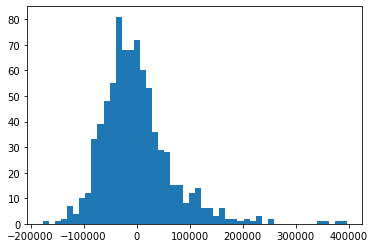

In [122]:
plt.hist(residuals2, bins=50);

In [123]:
pd.Series(residuals2).skew()

1.4986274366300496

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

1. Linearity -> Linear relationship
2. Independence (of observations) - Independence challenges are often time-series based
3. Normality -> Normality of error
4. Equal Variance -> The residual (errors) is random.
5. **Multicollinearity -> No High correlation between the features (independent variables).** This only applies for the MLR model as MLR have multiple features.

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

1. Linearity is met because the variables have a linear relationship with the price. (Check lmplot in section 3.)
2. The equal variance is not met as there are likely higher positive variance on average and the variance is cluster. Hence, further investigation on the cluster, edge cases and outliers.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [106]:
import statsmodels.api as sm
ols = sm.OLS(y, X).fit()

In [107]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     40.25
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          1.82e-160
Time:                        23:07:55   Log-Likelihood:                -10189.
No. Observations:                 812   AIC:                         2.046e+04
Df Residuals:                     771   BIC:                         2.065e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sq__ft                 135.1101      6.956     19.424      0.000     121.456     148.764
beds                 -2.136e+04   4698.955     -4.545      0.000   -3.06e+04   -1.21e+04
baths                 3700.3620   5884.407      0.629      0.530   -7850.998    1.53e+04
type_Condo            6.555e+04   1.41e+04      4.646      0.000    3.79e+04    9.32e+04
type_Multi-Family     6.604e+04   2.55e+04      2.594      0.010    1.61e+04    1.16e+05
type_Residential      1.085e+05   1.23e+04      8.802      0.000    8.43e+04    1.33e+05
city_ANTELOPE        -4.304e+04    1.4e+04     -3.084      0.002   -7.04e+04   -1.56e+04
city_AUBURN           8.774e+04   4.06e+04      2.161      0.031    8045.244    1.67e+05
city_CAMERON PARK     7.474e+04   6.85e+04      1.091      0.276   -5.97e+04    2.09e+05
city_CARMICHAEL       4.204e+04   1.69e+04      2.495      0.013    8956.195    7.51e+04
city_CITRUS HEIGHTS  -3.261e+04    1.4e+04     -2.324      0.020   -6.02e+04   -5059.064
city_COOL             5.126e+04   6.85e+04      0.748      0.455   -8.32e+04    1.86e+05
city_DIAMOND SPRINGS -1.149e+04   6.86e+04     -0.168      0.867   -1.46e+05    1.23e+05
city_EL DORADO        6324.6844   4.87e+04      0.130      0.897   -8.93e+04    1.02e+05
city_EL DORADO HILLS  1.997e+04      4e+04      0.499      0.618   -5.86e+04    9.86e+04
city_ELK GROVE       -3.449e+04   9863.951     -3.496      0.000   -5.39e+04   -1.51e+04
city_ELVERTA         -8.141e+04    3.5e+04     -2.324      0.020    -1.5e+05   -1.26e+04
city_FAIR OAKS        3.214e+04   2.38e+04      1.352      0.177   -1.45e+04    7.88e+04
city_FOLSOM           7.924e+04   1.91e+04      4.150      0.000    4.18e+04    1.17e+05
city_GALT            -3.196e+04    1.7e+04     -1.880      0.060   -6.53e+04    1410.539
city_GOLD RIVER         3.1e+04      4e+04      0.774      0.439   -4.76e+04     1.1e+05
city_GRANITE BAY      2.569e+05   4.04e+04      6.361      0.000    1.78e+05    3.36e+05
city_GREENWOOD        -4.14e+04   6.89e+04     -0.601      0.548   -1.77e+05    9.38e+04
city_LINCOLN         -3071.2631   2.88e+04     -0.107      0.915   -5.95e+04    5.34e+04
city_LOOMIS           3.334e+05   4.94e+04      6.746      0.000    2.36e+05     4.3e+05
city_MATHER          -9.687e+04   6.85e+04     -1.414      0.158   -2.31e+05    3.76e+04
city_MEADOW VISTA     1.753e+04   6.86e+04      0.255      0.799   -1.17e+05    1.52e+05
city_NORTH HIGHLANDS -6.904e+04   1.68e+04     -4.101      0.000   -1.02e+05    -3.6e+04
city_ORANGEVALE       1.247e+04   2.18e+04      0.572      0.567   -3.03e+04    5.52e+04
city_PENRYN           2.765e+05   6.85e+04      4.033      0.000    1.42e+05    4.11e+05
city_PLACERVILLE       1.26e+05   3.13e+04      4.023      0.000    6.45e+04    1.87e+05
city_POLLOCK PINES    3110.4401      4e+04      0.078    

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [108]:
def r2_adj(y,y_preds):
    return metrics.r2_score(y,y_preds)

In [109]:
r2_adj(y,y_preds)

0.4803237636121088

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [110]:
X = clean[['sq__ft', 'beds', 'baths', 'type']]
X = sm.add_constant(X)
y = clean['price']
dummy = pd.get_dummies(X, drop_first=True)

ols = sm.OLS(y, dummy).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          1.64e-115
Time:                        23:07:55   Log-Likelihood:                -10373.
No. Observations:                 812   AIC:                         2.076e+04
Df Residuals:                     806   BIC:                         2.079e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.283e+04   1.55e+04      1.472      0.141   -7618.618    5.33e+04
sq__ft              130.8241      7.345     17.810      0.000     116.406     145.242
beds              -1.456e+04   5470.263     -2.661      0.008   -2.53e+04   -3818.286
baths              7972.7413   6956.143      1.146      0.252   -5681.552    2.16e+04
type_Multi-Family -2.567e+04   2.93e+04     -0.876      0.381   -8.32e+04    3.19e+04
type_Residential   3.278e+04   1.47e+04      2.236      0.026    3999.885    6.16e+04
==============================================================================
Omnibus:                      215.318   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6800.490
Skew:                           0.501   Prob(JB):                         0.00
Kurtosis:                      17.142   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [111]:
clean.describe()

,zip,beds,baths,sq__ft,price,day,month
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.0
mean,95761.592365,3.245074,1.961823,1592.461823,229723.743842,18.204433,5.0
std,85.281835,0.851654,0.669778,664.036825,119819.020404,2.194058,0.0
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,15.000000,5.0
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,16.000000,5.0
50%,95820.000000,3.000000,2.000000,1419.500000,208000.000000,19.000000,5.0
75%,95828.250000,4.000000,2.000000,1852.250000,285000.000000,20.000000,5.0
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,21.000000,5.0


In [112]:
clean.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'day', 'month'],
      dtype='object')

In [113]:
X2.columns

Index(['sq__ft', 'beds', 'baths', 'type_Condo', 'type_Multi-Family',
       'type_Residential', 'city_ANTELOPE', 'city_AUBURN', 'city_CAMERON PARK',
       'city_CARMICHAEL', 'city_CITRUS HEIGHTS', 'city_COOL',
       'city_DIAMOND SPRINGS', 'city_EL DORADO', 'city_EL DORADO HILLS',
       'city_ELK GROVE', 'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM',
       'city_GALT', 'city_GOLD RIVER', 'city_GRANITE BAY', 'city_GREENWOOD',
       'city_LINCOLN', 'city_LOOMIS', 'city_MATHER', 'city_MEADOW VISTA',
       'city_NORTH HIGHLANDS', 'city_ORANGEVALE', 'city_PENRYN',
       'city_PLACERVILLE', 'city_POLLOCK PINES', 'city_RANCHO CORDOVA',
       'city_RANCHO MURIETA', 'city_RIO LINDA', 'city_ROCKLIN',
       'city_ROSEVILLE', 'city_SACRAMENTO', 'city_WALNUT GROVE',
       'city_WEST SACRAMENTO', 'city_WILTON'],
      dtype='object')

In [114]:
# Drop Type
X_vars = clean[['sq__ft', 'beds', 'baths']]
X_vars = sm.add_constant(X_vars)
y = clean['price']
dummy = pd.get_dummies(X_vars, drop_first=True)
ols2 = sm.OLS(y, dummy).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     252.5
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          1.46e-115
Time:                        23:07:56   Log-Likelihood:                -10378.
No. Observations:                 812   AIC:                         2.076e+04
Df Residuals:                     808   BIC:                         2.078e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.925e+04   1.23e+04      4.017      0.000    2.52e+04    7.33e+04
sq__ft       132.6894      7.312     18.148      0.000     118.338     147.041
beds       -1.219e+04   5196.924     -2.345      0.019   -2.24e+04   -1984.634
baths       4440.9968   6880.589      0.645      0.519   -9064.941    1.79e+04
==============================================================================
Omnibus:                      214.388   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6483.120
Skew:                           0.512   Prob(JB):                         0.00
Kurtosis:                      16.805   Cond. No.                     7.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
clean


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,day,month
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222,21,5
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212,21,5
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880,21,5
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307,21,5
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...
807,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,2008-05-15,232425,15,5
808,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,2008-05-15,234000,15,5
809,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,2008-05-15,235000,15,5
810,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,2008-05-15,235301,15,5


In [116]:
# Remove price outliers
upperlimit = clean["price"].mean() + 3*np.std(clean["price"])
remove = clean[clean["price"]<upperlimit]

# Remove sq outliers
upperlimit2 = clean["sq__ft"].mean() + 3*np.std(clean["sq__ft"])
remove = remove[remove["sq__ft"]<upperlimit2]

In [117]:
remove.describe()

,zip,beds,baths,sq__ft,price,day,month
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.0
mean,95762.590331,3.201018,1.921120,1530.314249,218499.337150,18.176845,5.0
std,85.264191,0.810944,0.629538,556.765005,99143.992062,2.204922,0.0
min,95603.000000,1.000000,1.000000,484.000000,30000.000000,15.000000,5.0
25%,95670.000000,3.000000,2.000000,1139.000000,146437.500000,16.000000,5.0
50%,95820.000000,3.000000,2.000000,1406.500000,205000.000000,19.000000,5.0
75%,95828.750000,4.000000,2.000000,1799.750000,275000.000000,20.000000,5.0
max,95864.000000,6.000000,4.000000,3516.000000,582000.000000,21.000000,5.0


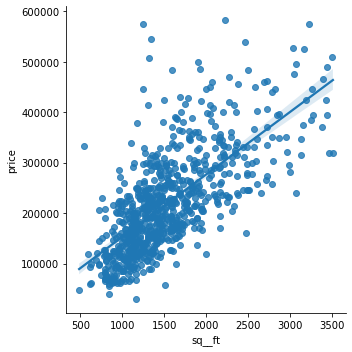

In [118]:
sns.lmplot(x = "sq__ft", y = "price", data = remove);

In [119]:
remove.describe()

,zip,beds,baths,sq__ft,price,day,month
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.0
mean,95762.590331,3.201018,1.921120,1530.314249,218499.337150,18.176845,5.0
std,85.264191,0.810944,0.629538,556.765005,99143.992062,2.204922,0.0
min,95603.000000,1.000000,1.000000,484.000000,30000.000000,15.000000,5.0
25%,95670.000000,3.000000,2.000000,1139.000000,146437.500000,16.000000,5.0
50%,95820.000000,3.000000,2.000000,1406.500000,205000.000000,19.000000,5.0
75%,95828.750000,4.000000,2.000000,1799.750000,275000.000000,20.000000,5.0
max,95864.000000,6.000000,4.000000,3516.000000,582000.000000,21.000000,5.0


In [120]:
X_vars2 = remove[['sq__ft', 'beds', 'baths', 'type','city']]
X_vars2 = sm.add_constant(X_vars2)
y2 = remove['price']
dummy2 = pd.get_dummies(X_vars2, drop_first=True)
ols2 = sm.OLS(y2, dummy2).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     29.76
Date:                Sun, 18 Sep 2022   Prob (F-statistic):          1.68e-123
Time:                        23:07:56   Log-Likelihood:                -9794.9
No. Observations:                 786   AIC:                         1.967e+04
Df Residuals:                     747   BIC:                         1.985e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.699e+04   1.69e+04      2.195      0.028    3904.429    7.01e+04
sq__ft                 131.9099      7.320     18.019      0.000     117.539     146.281
beds                 -1.926e+04   4495.561     -4.284      0.000   -2.81e+04   -1.04e+04
baths                -3533.8564   5637.227     -0.627      0.531   -1.46e+04    7532.837
type_Multi-Family     1.552e+04   2.27e+04      0.683      0.495   -2.91e+04    6.01e+04
type_Residential      4.296e+04   1.12e+04      3.850      0.000    2.11e+04    6.49e+04
city_AUBURN           1.274e+05   3.94e+04      3.234      0.001    5.01e+04    2.05e+05
city_CAMERON PARK      1.18e+05   6.52e+04      1.810      0.071   -9994.315    2.46e+05
city_CARMICHAEL       7.465e+04   1.86e+04      4.021      0.000    3.82e+04    1.11e+05
city_CITRUS HEIGHTS   6836.1840   1.58e+04      0.432      0.666   -2.43e+04    3.79e+04
city_COOL              9.27e+04   6.51e+04      1.424      0.155   -3.51e+04     2.2e+05
city_DIAMOND SPRINGS  2.944e+04   6.51e+04      0.452      0.651   -9.84e+04    1.57e+05
city_EL DORADO        4.479e+04   4.68e+04      0.957      0.339   -4.71e+04    1.37e+05
city_EL DORADO HILLS  6.107e+04   3.87e+04      1.578      0.115   -1.49e+04    1.37e+05
city_ELK GROVE        1.129e+04   1.29e+04      0.878      0.380   -1.39e+04    3.65e+04
city_ELVERTA          -4.12e+04   3.41e+04     -1.210      0.227   -1.08e+05    2.57e+04
city_FAIR OAKS        4.118e+04   2.54e+04      1.620      0.106   -8714.768    9.11e+04
city_FOLSOM           1.124e+05   2.06e+04      5.458      0.000     7.2e+04    1.53e+05
city_GALT             1.254e+04   1.85e+04      0.677      0.499   -2.38e+04    4.89e+04
city_GOLD RIVER       7.475e+04    3.9e+04      1.918      0.055   -1751.205    1.51e+05
city_GREENWOOD        4474.9121   6.58e+04      0.068      0.946   -1.25e+05    1.34e+05
city_LINCOLN           3.97e+04   2.85e+04      1.395      0.164   -1.62e+04    9.56e+04
city_LOOMIS            1.24e+05   6.52e+04      1.900      0.058   -4119.129    2.52e+05
city_MATHER           -5.34e+04   6.52e+04     -0.819      0.413   -1.81e+05    7.46e+04
city_MEADOW VISTA     5.095e+04   6.53e+04      0.780      0.435   -7.72e+04    1.79e+05
city_NORTH HIGHLANDS -3.179e+04   1.82e+04     -1.748      0.081   -6.75e+04    3920.742
city_ORANGEVALE       5.375e+04   2.23e+04      2.405      0.016    9882.224    9.76e+04
city_PENRYN           3.175e+05   6.51e+04      4.876      0.000     1.9e+05    4.45e+05
city_PLACERVILLE      1.128e+05    3.4e+04      3.323      0.001    4.62e+04    1.79e+05
city_POLLOCK PINES    4.242e+04   3.87e+04      1.095      0.274   -3.36e+04    1.18e+05
city_RANCHO CORDOVA  -4417.3266   1.82e+04     -0.243      0.808   -4.01e+04    3.13e+04
city_RANCHO MURIETA   1.282e+04   4.72e+04      0.271    

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

I think the model with square feet, beds, baths, type of house and city variables is in the sweet spot as the model have high R2 while the RMSE is low. Yet, the model needs to be cross validate with new data to confirm and adjust of bias or variance.